In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read in data 
IN_PATH = os.path.join("Data", "new_final_clean.csv")
OUTPUT_DIR_PLOTS = "plots"
OUTPUT_DIR_DATA = "Data"


Motorcycles_CV =\
    pd.read_csv(IN_PATH)

In [6]:
#data cleaning
    
Motorcycles_CV['City'] = Motorcycles_CV['City'].str.capitalize()

Motorcycles_CV['Brand'] = Motorcycles_CV['Brand'].str.capitalize()

Motorcycles_CV['Brand'] = Motorcycles_CV['Brand'].replace(['Hd','Harleydavidson','Harley'],'Harley Davidson')

Motorcycles_CV['Brand'] = Motorcycles_CV['Brand'].replace(['Ktm'],'KTM')

Motorcycles_CV['Brand'] = Motorcycles_CV['Brand'].replace(['Bmw'],'BMW')

Motorcycles_CV['City'] = Motorcycles_CV['City'].replace(['Corpuschristi'],'Corpus Christi')

Motorcycles_CV['City'] = Motorcycles_CV['City'].replace(['Collegestation'],'College Station')

Motorcycles_CV['City'] = Motorcycles_CV['City'].replace(['Easttexas'],'East Texas')

Motorcycles_CV['City'] = Motorcycles_CV['City'].replace(['Sanantonio'],'San Antonio')

Motorcycles_CV.loc[1567, 'Brand'] = 'Honda'

In [7]:
#peeking at some of the data

Brand_counts = Motorcycles_CV['Brand'].value_counts()

In [8]:
#exporting the CSV
write_df1 = Motorcycles_CV.to_csv(os.path.join(OUTPUT_DIR_DATA, "final_clean.csv"))

In [9]:
#getting brand by city counts
brand_city = Motorcycles_CV.groupby(['Brand','City'])['Brand'].count().reset_index(name="Count")


#exporting csv
write_df2 = brand_city.to_csv(os.path.join(OUTPUT_DIR_DATA, "brand_city_counts.csv"))


In [10]:
#creating brand popularity plot
plot_1 = (ggplot(Motorcycles_CV)
 + aes(x='Brand', fill= 'Brand')
 + geom_bar(size=20)
 + theme(axis_text_x = element_text(angle=45, hjust=1))
 + labs(title="Motorcycle Brand Popularity", 
         x="Brand", y = "Number of Listings")
)

#saving brand popularity plot to plot folder
ggsave(filename="plot1.png",
       plot=plot_1,
       device='png',
       dpi=300,
       height= 10,
       width= 10,
       path= os.path.join(OUTPUT_DIR_PLOTS)
      )

 


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 10 in image.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: plots/plot1.png


In [11]:
#creating the data for plot 2

mean_brand = (Motorcycles_CV.groupby('Brand')['Price'].mean())

mean_brand.to_csv(os.path.join(OUTPUT_DIR_DATA, "brand_avgs.csv"))

mean_brand = pd.read_csv(os.path.join("Data", "brand_avgs.csv"))

mean_brand['Price'] = mean_brand['Price'].round()


In [12]:
#Adding Plot 2 

plot_2 = (ggplot(mean_brand)
 + aes(x='Brand', y='Price', fill= 'Brand')
 + geom_bar(stat= "identity", size=20)
 + theme(axis_text_x = element_text(angle=45, hjust=1))
 + labs(title="Average Price by Motorcycle Brand", 
         x="Brand", y = "Average Price")
)


#saving brand popularity plot to plot folder
ggsave(filename = "plot2.png",
       plot=plot_2,
       device='png',
       dpi=300,
       height= 10,
       width= 10,
       path= os.path.join(OUTPUT_DIR_PLOTS)
      )

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 10 in image.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: plots/plot2.png


In [13]:
#cleaning data for color plot 

color_popularity = Motorcycles_CV['paint_color'].value_counts()

color_popularity.drop(["Unknown", "street legal"], inplace = True)

color_popularity.to_csv(os.path.join(OUTPUT_DIR_DATA, "color_popularity.csv"))

color_popularity = pd.read_csv(os.path.join("Data", "color_popularity.csv"))

color_popularity = color_popularity.rename(columns = {"Unnamed: 0" : "Color"})

color_popularity['Color'] = color_popularity['Color'].str.capitalize()

                    


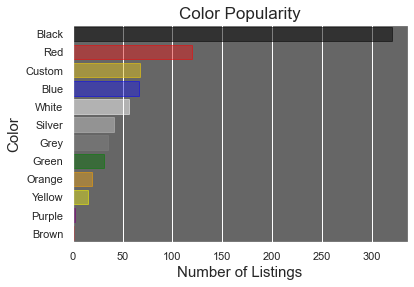

In [29]:
#plotting color popularity 

sns.set_style("darkgrid", {"axes.facecolor": ".4"})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4.5})
color_popularity.columns = ['Color', 'paint_color']
color_list = list(color_popularity['Color'].str.lower())
color_popularity.color = color_popularity['Color'].apply(lambda x: str(x).capitalize())
color_list = ['gold' if item == 'custom' else item for item in color_list]
sns.barplot(x = 'paint_color', y = 'Color', data = color_popularity, orient = "h", palette = color_list, edgecolor = color_list, 
           alpha = .5)
plt.ylabel('Color', fontname="Arial", size = 15)
plt.xlabel('Number of Listings', fontname = "Arial", size = 15)
plt.title("Color Popularity", size = 17) 

#saving the plot

plt.savefig('plots/plot3.png', dpi = 300)

         
         
         
